In [ ]:
import keras

# IMDB 리뷰 데이터셋
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=200)

In [26]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [27]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 2,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 2,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 2,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 2,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 2,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 2,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 2,
 92,
 25,
 104,
 4,
 2,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 2,
 5,
 16,
 2,
 113,
 103,
 32,
 15,
 16,
 2,


In [28]:
len(train_input[1])

189

In [29]:
# 훈련, 검증 세트

from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [30]:
# 단어 갯수의 분포로 가장 많이 분포가 되어 있는 단어 갯수를 파악

import numpy as np
lengths = [len(x) for x in train_input]

print(f"평균:{np.mean(lengths)}, 중앙값:{np.median(lengths)}, 최대:{np.max(lengths)}, 최소:{np.min(lengths)}")

평균:238.07115, 중앙값:178.0, 최대:2494, 최소:11


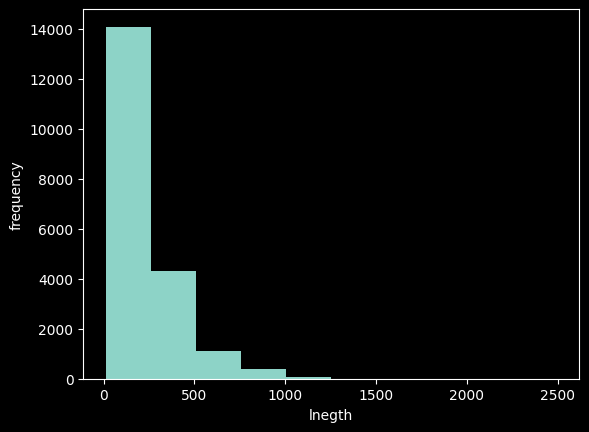

In [31]:
import matplotlib.pyplot as plt

plt.hist(lengths) # 히스토그램 그리기 : 수치읭 빈도를 가지고 그래프 작성
plt.xlabel('lnegth')
plt.ylabel('frequency')
plt.show()

In [32]:
# 패딩 처리 - 학습 입력 데이터의 개수는 동일, 문장의 갯수는 동일하지 않음!!
# 따라서, 동일한 기준으로 조정해준다 (적으면 0으로 채우고 많으면 자르고!!)

from keras.preprocessing.sequence import pad_sequences

In [33]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [34]:
# 원핫 인코딩

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [35]:
print(train_oh.shape)

(20000, 100, 200)


In [36]:
# 순회 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, 200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 옵티마이저, 손실함수, 측정지표
model. compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [39]:
hist = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5123 - loss: 0.6954 - val_accuracy: 0.5236 - val_loss: 0.6887
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5474 - loss: 0.6825 - val_accuracy: 0.6726 - val_loss: 0.6081
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6783 - loss: 0.6034 - val_accuracy: 0.6734 - val_loss: 0.6109
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7157 - loss: 0.5716 - val_accuracy: 0.7120 - val_loss: 0.5673
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7279 - loss: 0.5551 - val_accuracy: 0.7146 - val_loss: 0.5604
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7244 - loss: 0.5529 - val_accuracy: 0.7192 - val_loss: 0.5583
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7354 - loss: 0.5396 - val_accuracy: 0.7186 - val_loss: 0.5494
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7370 - loss: 0.5376 - val_acc

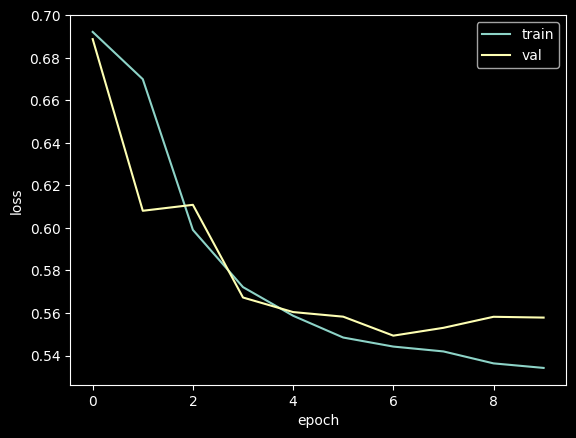

In [40]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [41]:
# 단어 임베딩,  지정된 크기 만큼의 실수 밀집 벡터로 변환, 벡터는 유의미한 데이터, 학습을 반복하면서 조정..(경사하강법)

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=500)

# 훈련세트, 검증세트
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [42]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [43]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500, 16))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])